In [1]:
# CNN implementation from Scratch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pickle
import random
import pixellib
from pixellib.instance import custom_segmentation
from scipy.ndimage import zoom
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from PIL import Image, ImageEnhance
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

from sklearn.metrics import confusion_matrix

In [2]:
#File Paths for images in local directory
DATADIR = "small_dataset\\data\\"


SMOL_CTGR = ["Bacterial leaf blight", "Brown spot", "Leaf smut" ]
TWO_CTGR = ["Disease", "Healthy"]
CATEGORIES = ["BrownSpot","Healthy", 'Hispa', 'LeafBlast']

In [3]:
#Masking
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

Bacterial leaf blight1.png
DSC_0365.JPG


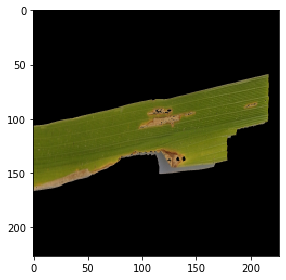

In [5]:
#Preprocessing (otsu_thresholding, BGR to RGB and resizing)

for category in SMOL_CTGR:
    count = 1
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        #Create Filenames for preprocessed images
        filename = category + str(count) + ".png"
        print(filename)
        count+=1
        #Loading image from directory
        some_img = imread(os.path.join(path,img))
        
        
        gray_img = rgb2gray(some_img)
        
        
        thresh = threshold_otsu(gray_img)
        thresh_otsu = gray_img < thresh
        
        filtered = masked_image(some_img, thresh_otsu)
        resize_img = cv2.resize(filtered, (227,227), interpolation = cv2.INTER_AREA)
#         rgb_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
        print(img)
        imshow(resize_img)
        break
    break
#         cv2.imwrite(filename, rgb_img)

# Testing Different Preprocessing Methods

In [ ]:
#Testing different proprocessing methods
for category in CATEGORIES:
    path = os.path.join(ORIGCROPDATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image_file = Image.open(img_path)
        
#         image_file.save(img, quality = 95)
       
        img_array = cv2.imread(os.path.join(path,img))
        resize_img = cv2.resize(img_array, (227,227), interpolation = cv2.INTER_AREA)
        canny_img = Canny_detector(resize_img)
        
        clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
        
        lab = cv2.cvtColor(resize_img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        
        l2 = clahe.apply(l)
        
        lab = cv2.merge((l2,a,b))
        
        enc_img1 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        
#         test_img_new = enc_img * [0,1,0] #Only color is green [R,G,B]
        test_img_new = cv2.cvtColor(enc_img1, cv2.COLOR_RGB2LAB)
        l,a,b = cv2.split(test_img_new)
        
        l2 = clahe.apply(l)
        
        lab = cv2.merge((l2,a,b))
        
        enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
        
        
        test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
        l,a,b = cv2.split(test_img_new)
        
        l2 = clahe.apply(l)
        
        lab = cv2.merge((l2,a,b))
        
        test_img_new = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
        
        kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
        sharp_img = cv2.filter2D(enc_img, ddepth = -1, kernel = kernel)
#         sharp_img = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)
#         cv2.imwrite('test.jpeg', enc_img)
        RBG_img1 = cv2.cvtColor(resize_img, cv2.IMREAD_GRAYSCALE)
        RBG_img1 = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
        _, segmented1 = cv2.threshold(RBG_img1, 127, 255, cv2.THRESH_BINARY)
        RBG_img2 = cv2.cvtColor(segmented1, cv2.COLOR_BGR2RGB)
        
        #Visualization of original to enhanced to 
        fig, ax = plt.subplots(1,3, figsize =(10,10))
        
        
        ax[0].imshow(RBG_img1)
        ax[0].set_title("Original")
        ax[0].set_xlabel(category)
        
        ax[1].imshow(enc_img1)
        ax[1].set_title("Enchanced (Contrast)")
        ax[1].set_xlabel(category)
        
        ax[2].imshow(sharp_img)
        ax[2].set_title("Test Image")
        ax[2].set_xlabel(category)
        
        
        rgb_splitter(sharp_img)
        break

In [ ]:
#Visualize images in training dataset
fig, axes = plt.subplots(2, 5, figsize = (15,10))
#TRUE LABEL of Training Data
for index in range(10):   
    ax = axes[index//5, index%5]
    ax.imshow(X_train[index])
    ax.set_title(classes[y_train[index]]) 
plt.tight_layout()
plt.show()

# Visualization of threshed images

In [ ]:
#Shows images from CROPDATADIR file path
for category in CATEGORIES:
    path = os.path.join(CROPDATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image_file = Image.open(img_path)
        
#         image_file.save(img, quality = 95)
        
        img_array = cv2.imread(os.path.join(path,img))
        
        
        RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        zoom1 = clipped_zoom(RBG_img, 2)
        zoom2 = clipped_zoom(RBG_img, 3)
        fig, ax = plt.subplots(1, 3)
        ax[0].imshow(image_file)
        ax[1].imshow(zoom1)
        ax[2].imshow(zoom2)
        break
    break

In [ ]:
#DONT RUN THIS ANYMORE, WITHOUT CHANGING THE PATH OF THE FILENAME!!!!!!!!!!!!!!!!!!!!
#ORIGINAL CROPPED DATASET IS IN NEW FOLDER!!!!!!!
# #Adding augmentation then adding to dataset (Di pa na aadd ung augmented images sa dataset)
# for category in CATEGORIES:
#     count = 1
#     path = os.path.join(CROPDATADIR, category)
#     print(path)
#     for img in os.listdir(path):
#         filename_90 = path + "\\" + category + str(count) + "_90" + ".png"
#         filename_180 = path + "\\" + category + str(count) + "_180" + ".png"
#         filename_270 = path + "\\" + category + str(count) + "_270" + ".png"
#         img_array = cv2.imread(os.path.join(path,img))
#         RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
#         rotate_90_img = cv2.rotate(img_array, cv2.cv2.ROTATE_90_CLOCKWISE)
#         rotate_270_img = cv2.rotate(img_array, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
#         rotate_180_img = cv2.rotate(img_array, cv2.ROTATE_180)
#         fig, ax = plt.subplots(1,4,figsize = (12,6))
#         count+=1
# #         ax[0].imshow(RBG_img)
# #         ax[0].set_title("Original")
        
# #         ax[1].imshow(rotate_90_img)
# #         ax[1].set_title("Rotated - 90 degrees")
        
#         cv2.imwrite(filename_90, rotate_90_img)
        
# #         ax[2].imshow(rotate_180_img)
# #         ax[2].set_title("Rotated - 180 degrees")
        
#         cv2.imwrite(filename_180, rotate_180_img)
        
# #         ax[3].imshow(rotate_270_img)
# #         ax[3].set_title("Rotated - 270 degrees")
        
#         cv2.imwrite(filename_270, rotate_270_img)
# #         break
# #     break

# Generate Dataset with 4 classes (Brown Spot, Healthy, Hispa, LeafBlasts)

In [ ]:
#Build the actual TRAINING DATASET
training_data = []

def create_training_data():
    for i in range(len(CATEGORIES)):
        category = CATEGORIES[i]
        path = os.path.join(ORIGCROPDATADIR, category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image_file = Image.open(img_path)

#             image_file.save(img, quality = 95)
            
            img_array = cv2.imread(os.path.join(path,img))
            clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
            
            resize_img = cv2.resize(img_array, (224,224), interpolation = cv2.INTER_AREA)
            lab = cv2.cvtColor(resize_img, cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    #         test_img_new = enc_img * [0,1,0] #Only color is green [R,G,B]
            test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
            l,a,b = cv2.split(test_img_new)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

#             test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
#             l,a,b = cv2.split(test_img_new)

#             l2 = clahe.apply(l)

#             lab = cv2.merge((l2,a,b))

#             test_img_new = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            kernel = np.array([[0, -1, 0],
                               [-1, 5.35,-1],
                               [0, -1, 0]])
            sharp_img = cv2.filter2D(enc_img, ddepth = -1, kernel = kernel)

#             RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            blur_img = cv2.GaussianBlur(enc_img, (7,7), 0)
            plt.imshow(blur_img)
            
            training_data.append([blur_img,i])
            print(CATEGORIES[i])
#             break
#         break
create_training_data()

In [ ]:
random.shuffle(training_data)

In [ ]:
#Separation of images from their respective labels/classes
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 224,224,3)
print(len(X))
print(len(y))
print(X.shape)
y[:10]

In [ ]:
#Turn x(images), and y(labels) arrays to pickle files
pickle_out = open('pickles\\X_cropped_lab2_blur_two_classes.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickles\\y_cropped_lab2_blur_two_classes.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()


# Generate Dataset based on 3 classes

In [150]:
#Build the actual DATASET on THREE Classes (Bacterial leaf blight, Brown spot, Leaf smut)
training_data = []
blight_data = []
brown_data = []
smut_data = []
filename_blight = []
filename_brown = []
filename_smut = []
def create_dataset():
    for i in range(len(SMOL_CTGR)):
        category = SMOL_CTGR[i]
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image_file = Image.open(img_path)

#             image_file.save(img, quality = 95)
            
            img_array = cv2.imread(os.path.join(path,img))
        
            resize_img = cv2.resize(img_array, (224,224), interpolation = cv2.INTER_AREA)
        
            
                
                
            gray_img = rgb2gray(resize_img)


            thresh = threshold_otsu(gray_img)
            thresh_otsu = gray_img < thresh

            
            if (img == "blacked1.jpg" or img == "blacked2.jpg" or img == "blacked3.jpg" or img == "blacked4.jpg" or img == "blacked5.jpg") and (category == "Leaf smut" or category == "Brown spot" or category == "Bacterial leaf blight"):
                print("Found black images")
                filtered = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
                lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
            else:
                filtered = masked_image(resize_img, thresh_otsu)
                filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
                lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
            
            
            
            clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
            
            l, a, b = cv2.split(lab)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))
            
            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    #         test_img_new = enc_img * [0,1,0] #Only color is green [R,G,B]
            test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
            l,a,b = cv2.split(test_img_new)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            
            rotate_90_img_enc = cv2.rotate(enc_img, cv2.cv2.ROTATE_90_CLOCKWISE)
            rotate_270_img_enc = cv2.rotate(enc_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotate_180_img_enc = cv2.rotate(enc_img, cv2.ROTATE_180)
            
            flip_x_enc = cv2.flip(enc_img, 0)
            flip_y_enc = cv2.flip(enc_img, 1)
            flip_xy_enc = cv2.flip(enc_img, -1)
#             test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
#             l,a,b = cv2.split(test_img_new)

#             l2 = clahe.apply(l)

#             lab = cv2.merge((l2,a,b))

#             test_img_new = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            kernel = np.array([[0, -1, 0],
                               [-1, 4.9,-1],
                               [0, -1, 0]])
            sharp_img = cv2.filter2D(enc_img, ddepth = -1, kernel = kernel)
        
            rotate_90_img_sharp = cv2.rotate(sharp_img, cv2.cv2.ROTATE_90_CLOCKWISE)
            rotate_270_img_sharp = cv2.rotate(sharp_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotate_180_img_sharp = cv2.rotate(sharp_img, cv2.ROTATE_180)
            
            flip_x_sharp = cv2.flip(sharp_img, 0)
            flip_y_sharp = cv2.flip(sharp_img, 1)
            flip_xy_sharp = cv2.flip(sharp_img, -1)
#             RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

            blur_img = cv2.GaussianBlur(sharp_img, (7,7), 0)
    
            rotate_90_img_blur = cv2.rotate(blur_img, cv2.cv2.ROTATE_90_CLOCKWISE)
            rotate_270_img_blur = cv2.rotate(blur_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotate_180_img_blur = cv2.rotate(blur_img, cv2.ROTATE_180)
            
            flip_x_blur = cv2.flip(blur_img, 0)
            flip_y_blur = cv2.flip(blur_img, 1)
            flip_xy_blur = cv2.flip(blur_img, -1)
            
            if category == "Bacterial leaf blight":
                blight_data.append([sharp_img,i])
                blight_data.append([rotate_90_img_sharp,i])
                blight_data.append([rotate_180_img_sharp,i])
                blight_data.append([rotate_270_img_sharp,i])
                blight_data.append([flip_x_sharp,i])
                blight_data.append([flip_y_sharp,i])
                blight_data.append([flip_xy_sharp,i])

                blight_data.append([enc_img,i])
                blight_data.append([rotate_90_img_enc,i])
                blight_data.append([rotate_180_img_enc,i])
                blight_data.append([rotate_270_img_enc,i])
                blight_data.append([flip_x_enc,i])
                blight_data.append([flip_y_enc,i])
                blight_data.append([flip_xy_enc,i])

                blight_data.append([blur_img,i])
                blight_data.append([rotate_90_img_blur,i])
                blight_data.append([rotate_180_img_blur,i])
                blight_data.append([rotate_270_img_blur,i])
                blight_data.append([flip_x_blur,i])
                blight_data.append([flip_y_blur,i])
                blight_data.append([flip_xy_blur,i])
                
                filename_blight.append(img)
            elif category == "Brown spot":
                brown_data.append([sharp_img,i])
                brown_data.append([rotate_90_img_sharp,i])
                brown_data.append([rotate_180_img_sharp,i])
                brown_data.append([rotate_270_img_sharp,i])
                brown_data.append([flip_x_sharp,i])
                brown_data.append([flip_y_sharp,i])
                brown_data.append([flip_xy_sharp,i])

                brown_data.append([enc_img,i])
                brown_data.append([rotate_90_img_enc,i])
                brown_data.append([rotate_180_img_enc,i])
                brown_data.append([rotate_270_img_enc,i])
                brown_data.append([flip_x_enc,i])
                brown_data.append([flip_y_enc,i])
                brown_data.append([flip_xy_enc,i])

                brown_data.append([blur_img,i])
                brown_data.append([rotate_90_img_blur,i])
                brown_data.append([rotate_180_img_blur,i])
                brown_data.append([rotate_270_img_blur,i])
                brown_data.append([flip_x_blur,i])
                brown_data.append([flip_y_blur,i])
                brown_data.append([flip_xy_blur,i])
                
                filename_brown.append(img)
            elif category == "Leaf smut":
                smut_data.append([sharp_img,i])
                smut_data.append([rotate_90_img_sharp,i])
                smut_data.append([rotate_180_img_sharp,i])
                smut_data.append([rotate_270_img_sharp,i])
                smut_data.append([flip_x_sharp,i])
                smut_data.append([flip_y_sharp,i])
                smut_data.append([flip_xy_sharp,i])

                smut_data.append([enc_img,i])
                smut_data.append([rotate_90_img_enc,i])
                smut_data.append([rotate_180_img_enc,i])
                smut_data.append([rotate_270_img_enc,i])
                smut_data.append([flip_x_enc,i])
                smut_data.append([flip_y_enc,i])
                smut_data.append([flip_xy_enc,i])

                smut_data.append([blur_img,i])
                smut_data.append([rotate_90_img_blur,i])
                smut_data.append([rotate_180_img_blur,i])
                smut_data.append([rotate_270_img_blur,i])
                smut_data.append([flip_x_blur,i])
                smut_data.append([flip_y_blur,i])
                smut_data.append([flip_xy_blur,i])
                filename_smut.append(img)
            print(SMOL_CTGR[i])
            
create_dataset()

Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Found black images
Brown spot
Found black images
Brown spot
Found black images
Brown spot
Brown spot
Brown spot
Brown sp

In [7]:

print("Blight: ", len(blight_data), " Brown spot: " , len(brown_data) ," Smut: " , len(smut_data))


Blight:  840  Brown spot:  840  Smut:  840


In [155]:
print("Blight")
for name in filename_blight:
    print(name)
print("=========================")
print("Brown")
for name in filename_brown:
    print(name)
print("=========================")
print("Smut")
for name in filename_smut:
    print(name)
print("=========================")

Blight
DSC_0365.JPG
DSC_0366.jpg
DSC_0367.JPG
DSC_0370.jpg
DSC_0372.JPG
DSC_0373.JPG
DSC_0374.JPG
DSC_0375.JPG
DSC_0376.JPG
DSC_0377.JPG
DSC_0378.JPG
DSC_0379.JPG
DSC_0380.JPG
DSC_0381.JPG
DSC_0382.JPG
DSC_0383.JPG
DSC_0384.JPG
DSC_0385.jpg
DSC_0386.JPG
DSC_0388.JPG
DSC_0389.JPG
DSC_0390.JPG
DSC_0392.JPG
DSC_0393.JPG
DSC_0395.JPG
DSC_0396.JPG
DSC_0397.JPG
DSC_0398.JPG
DSC_0399.JPG
DSC_0400.JPG
DSC_0401.JPG
DSC_0402.JPG
DSC_0403.JPG
DSC_0404.JPG
DSC_0405.JPG
DSC_0406.JPG
DSC_0700.jpg
DSC_0701.jpg
DSC_0702.jpg
DSC_0703.JPG
Brown
blacked1.jpg
blacked2.jpg
blacked3.jpg
DSC_0100.jpg
DSC_0101.jpg
DSC_0104.jpg
DSC_0106.jpg
DSC_0107.jpg
DSC_0108.jpg
DSC_0109.jpg
DSC_0110.jpg
DSC_0111.jpg
DSC_0112.jpg
DSC_0113.jpg
DSC_0114.jpg
DSC_0115.jpg
DSC_0118.jpg
DSC_0119.jpg
DSC_0121.jpg
DSC_0292.JPG
DSC_0295.JPG
DSC_0296.jpg
DSC_0299.JPG
DSC_0300.JPG
DSC_0301.JPG
DSC_0302.JPG
DSC_0303.JPG
DSC_0304.JPG
DSC_0305.JPG
DSC_0306.JPG
DSC_0307.JPG
DSC_0323.JPG
DSC_0324.JPG
DSC_0325.JPG
DSC_0329.jpg
DSC_0332.JPG

760


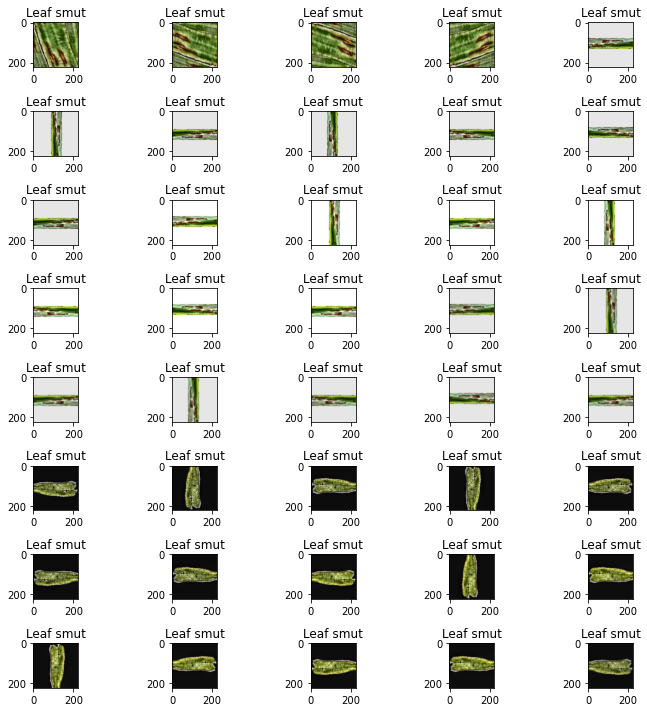

In [158]:
fig, axes = plt.subplots(8,5,figsize= (10,10))
X_dummy = []
y_dummy = []
for features, label in smut_data[80:]:
    X_dummy.append(features)
    y_dummy.append(label)
print(len(X_dummy))    
for index in range(40):
    ax = axes[index//5, index%5]
    ax.imshow(X_dummy[index])
    ax.set_title(SMOL_CTGR[y_dummy[index]])
plt.tight_layout()
plt.show()

In [159]:
#Important: Shuffle training_data to rearrange the dataset itself
random.shuffle(blight_data)
random.shuffle(brown_data)
random.shuffle(smut_data)

In [160]:
#For splitting to test and training for 3 classes
X = []
y = []

dataset = []

for features, label in blight_data:
    dataset.append([features,label])
    
for features, label in brown_data:
    dataset.append([features,label])
    
for features, label in smut_data:
    dataset.append([features,label])
    


random.shuffle(dataset)

for features, label in dataset:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,224,224,3)

print(X.shape)
print(type(X))
print(y[:10])
print("Total: ", len(X))

(2520, 224, 224, 3)
<class 'numpy.ndarray'>
[0, 2, 1, 2, 0, 0, 1, 1, 1, 1]
Total:  2520


In [161]:
#Turn x(images), and y(labels) arrays to pickle files
pickle_out = open('pickles\\small_dataset\\X_dataset_3_classes.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickles\\small_dataset\\y_dataset_3_classes.pickle', 'wb')
pickle.dump(y, pickle_out)

pickle_out.close()